In [1]:
# CELL 1: Setup and Data Generation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Install required packages
!pip install transformers -q

# Load TinyLlama model
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")
model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")

class MarketDataGenerator:
    def __init__(self):
        self.categories = ['Beverages', 'Food', 'Health & Beauty', 'Home Care', 'Personal Care']
        self.regions = ['North', 'South', 'East', 'West', 'Central']
        self.brands = {
            'Beverages': ['CocaCola', 'Pepsi', 'Nestle', 'RedBull', 'Tropicana'],
            'Food': ['Maggi', 'Britannia', 'Parle', 'ITC', 'Amul'],
            'Health & Beauty': ['Lakme', 'Olay', 'Nivea', 'Dove', 'Himalaya'],
            'Home Care': ['Surf', 'Ariel', 'Vim', 'Harpic', 'Lizol'],
            'Personal Care': ['Ponds', 'Fair&Lovely', 'Colgate', 'Closeup', 'Sensodyne']
        }

    def generate_sales_data(self, months=12):
        """Generate realistic market research sales data"""
        data = []
        start_date = datetime.now() - timedelta(days=30*months)

        for month in range(months):
            current_date = start_date + timedelta(days=30*month)

            for category in self.categories:
                for region in self.regions:
                    for brand in self.brands[category]:
                        # Simulate seasonal trends and regional preferences
                        base_sales = np.random.normal(50000, 15000)
                        seasonal_factor = 1 + 0.3 * np.sin(2 * np.pi * month / 12)
                        regional_factor = np.random.uniform(0.7, 1.3)

                        sales = max(0, base_sales * seasonal_factor * regional_factor)
                        market_share = np.random.uniform(0.05, 0.25)

                        data.append({
                            'Date': current_date.strftime('%Y-%m'),
                            'Category': category,
                            'Region': region,
                            'Brand': brand,
                            'Sales_Volume': int(sales),
                            'Market_Share': round(market_share, 3),
                            'Price_Index': np.random.uniform(95, 105)
                        })

        return pd.DataFrame(data)

    def generate_consumer_insights(self, df):
        """Generate consumer behavior insights from sales data"""
        insights = []

        # Top performing categories
        cat_performance = df.groupby('Category')['Sales_Volume'].sum().sort_values(ascending=False)
        insights.append(f"Top performing category: {cat_performance.index[0]} with {cat_performance.iloc[0]:,.0f} units")

        # Regional analysis
        region_performance = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)
        insights.append(f"Strongest region: {region_performance.index[0]} with {region_performance.iloc[0]:,.0f} units")

        # Brand concentration
        brand_performance = df.groupby('Brand')['Market_Share'].mean().sort_values(ascending=False)
        insights.append(f"Market leader: {brand_performance.index[0]} with {brand_performance.iloc[0]:.1%} avg market share")

        # Seasonal trends
        monthly_sales = df.groupby('Date')['Sales_Volume'].sum()
        peak_month = monthly_sales.idxmax()
        insights.append(f"Peak sales month: {peak_month} with {monthly_sales.max():,.0f} units")

        return insights

# Generate sample market research data
generator = MarketDataGenerator()
sales_df = generator.generate_sales_data(12)
consumer_insights = generator.generate_consumer_insights(sales_df)

print("📊 Market Research Data Generated")
print(f"Dataset shape: {sales_df.shape}")
print("\n🔍 Key Insights:")
for insight in consumer_insights:
    print(f"• {insight}")

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

📊 Market Research Data Generated
Dataset shape: (1500, 7)

🔍 Key Insights:
• Top performing category: Home Care with 15,483,694 units
• Strongest region: South with 15,576,132 units
• Market leader: Britannia with 16.2% avg market share
• Peak sales month: 2024-11 with 8,154,208 units


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


🤖 Generating AI-Powered Market Insights...

💡 AI Market Analysis:
1. Identify the top five categories and brands that dominate the market
    - Home Care: This is a highly commoditized market, with a large number of players and a high concentration of market share among a select few.
    - Top region: South: This region has a large and growing population, and there is strong demand for home care services.

2. Determine the trends and drivers for the market
    - Increasing demand for home care services: The COVID-19 pandemic has accelerated demand for home care services due to the need for social distancing and physical isolation.
    - Demographic shifts: As the population ages, demand for home care

📈 Creating Market Dashboard...


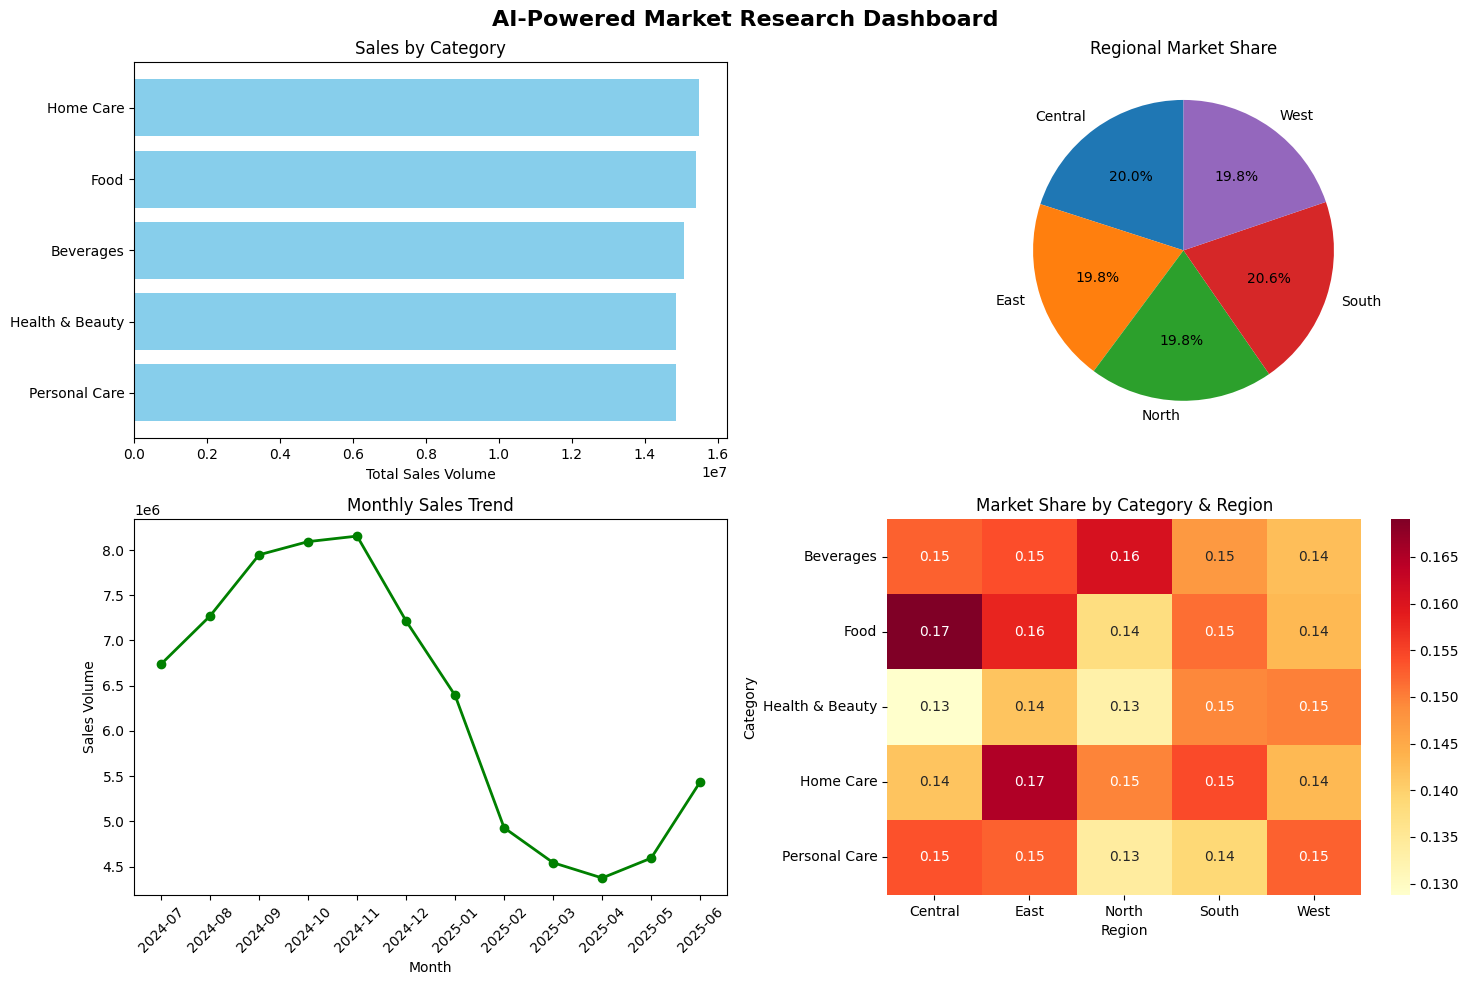

In [2]:
# CELL 2: AI-Powered Analysis and Visualization
class AIMarketAnalyzer:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def generate_market_insights(self, data_summary, max_length=150):
        """Generate AI-powered market insights using TinyLlama"""
        prompt = f"""<|system|>
You are a market research analyst. Analyze the following data and provide 2-3 key business insights.

<|user|>
Market Data Summary:
{data_summary}

Provide strategic insights for business decision making.
<|assistant|>"""

        inputs = self.tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)

        with torch.no_grad():
            outputs = self.model.generate(
                inputs.input_ids,
                max_length=inputs.input_ids.shape[1] + max_length,
                temperature=0.7,
                do_sample=True,
                pad_token_id=self.tokenizer.eos_token_id
            )

        generated_text = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        # Extract only the assistant's response
        response = generated_text.split("<|assistant|>")[-1].strip()
        return response

    def create_market_dashboard(self, df):
        """Create comprehensive market analysis dashboard"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('AI-Powered Market Research Dashboard', fontsize=16, fontweight='bold')

        # 1. Category Performance
        cat_sales = df.groupby('Category')['Sales_Volume'].sum().sort_values(ascending=True)
        axes[0,0].barh(cat_sales.index, cat_sales.values, color='skyblue')
        axes[0,0].set_title('Sales by Category')
        axes[0,0].set_xlabel('Total Sales Volume')

        # 2. Regional Distribution
        region_sales = df.groupby('Region')['Sales_Volume'].sum()
        axes[0,1].pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
        axes[0,1].set_title('Regional Market Share')

        # 3. Monthly Trends
        monthly_trend = df.groupby('Date')['Sales_Volume'].sum()
        axes[1,0].plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2, color='green')
        axes[1,0].set_title('Monthly Sales Trend')
        axes[1,0].set_xlabel('Month')
        axes[1,0].set_ylabel('Sales Volume')
        axes[1,0].tick_params(axis='x', rotation=45)

        # 4. Market Share Heatmap
        market_share_pivot = df.pivot_table(values='Market_Share', index='Category', columns='Region', aggfunc='mean')
        sns.heatmap(market_share_pivot, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[1,1])
        axes[1,1].set_title('Market Share by Category & Region')

        plt.tight_layout()
        plt.show()

        return fig

# Initialize AI analyzer
import torch
analyzer = AIMarketAnalyzer(model, tokenizer)

# Generate data summary for AI analysis
summary_stats = {
    'total_sales': sales_df['Sales_Volume'].sum(),
    'avg_market_share': sales_df['Market_Share'].mean(),
    'top_category': sales_df.groupby('Category')['Sales_Volume'].sum().idxmax(),
    'top_region': sales_df.groupby('Region')['Sales_Volume'].sum().idxmax(),
    'categories_count': sales_df['Category'].nunique(),
    'brands_count': sales_df['Brand'].nunique()
}

data_summary = f"""
Total Sales: {summary_stats['total_sales']:,.0f} units
Average Market Share: {summary_stats['avg_market_share']:.1%}
Top Category: {summary_stats['top_category']}
Top Region: {summary_stats['top_region']}
Categories Analyzed: {summary_stats['categories_count']}
Brands Tracked: {summary_stats['brands_count']}
"""

print("🤖 Generating AI-Powered Market Insights...")
ai_insights = analyzer.generate_market_insights(data_summary)
print(f"\n💡 AI Market Analysis:\n{ai_insights}")

print("\n📈 Creating Market Dashboard...")
dashboard = analyzer.create_market_dashboard(sales_df)

In [3]:
# CELL 3: Advanced Analytics and Recommendations
class MarketRecommendationEngine:
    def __init__(self, df):
        self.df = df

    def identify_growth_opportunities(self):
        """Identify potential growth opportunities using data analysis"""
        opportunities = []

        # Low market share brands with high sales potential
        brand_analysis = self.df.groupby(['Brand', 'Category']).agg({
            'Sales_Volume': 'sum',
            'Market_Share': 'mean'
        }).reset_index()

        # Find underperforming brands
        underperformers = brand_analysis[
            (brand_analysis['Market_Share'] < 0.15) &
            (brand_analysis['Sales_Volume'] > brand_analysis['Sales_Volume'].median())
        ]

        if not underperformers.empty:
            top_opportunity = underperformers.iloc[0]
            opportunities.append(f"Growth Opportunity: {top_opportunity['Brand']} in {top_opportunity['Category']} - Low market share ({top_opportunity['Market_Share']:.1%}) but decent sales volume")

        # Regional expansion opportunities
        region_category = self.df.groupby(['Region', 'Category'])['Sales_Volume'].sum().unstack(fill_value=0)
        region_totals = region_category.sum(axis=1)
        weakest_region = region_totals.idxmin()
        opportunities.append(f"Regional Expansion: {weakest_region} region shows lower overall sales - potential for market penetration")

        # Seasonal opportunities
        monthly_sales = self.df.groupby('Date')['Sales_Volume'].sum()
        lowest_month = monthly_sales.idxmin()
        opportunities.append(f"Seasonal Strategy: {lowest_month} shows lowest sales - opportunity for targeted campaigns")

        return opportunities

    def generate_executive_summary(self):
        """Generate executive summary with key metrics"""
        total_sales = self.df['Sales_Volume'].sum()
        avg_market_share = self.df['Market_Share'].mean()
        top_performers = self.df.groupby('Brand')['Sales_Volume'].sum().nlargest(3)

        summary = f"""
        📋 EXECUTIVE SUMMARY - MARKET RESEARCH ANALYSIS

        📊 KEY METRICS:
        • Total Market Volume: {total_sales:,.0f} units
        • Average Market Share: {avg_market_share:.1%}
        • Analysis Period: 12 months
        • Markets Covered: {self.df['Region'].nunique()} regions
        • Product Categories: {self.df['Category'].nunique()}

        🏆 TOP PERFORMERS:
        """

        for i, (brand, sales) in enumerate(top_performers.items(), 1):
            summary += f"        {i}. {brand}: {sales:,.0f} units\n"

        return summary

    def create_recommendation_report(self):
        """Create comprehensive recommendation report"""
        opportunities = self.identify_growth_opportunities()
        summary = self.generate_executive_summary()

        print(summary)
        print("\n🎯 STRATEGIC RECOMMENDATIONS:")
        for i, opp in enumerate(opportunities, 1):
            print(f"{i}. {opp}")

        # Export key data for further analysis
        export_data = {
            'category_performance': self.df.groupby('Category')['Sales_Volume'].sum().to_dict(),
            'regional_performance': self.df.groupby('Region')['Sales_Volume'].sum().to_dict(),
            'brand_market_share': self.df.groupby('Brand')['Market_Share'].mean().to_dict(),
            'monthly_trends': self.df.groupby('Date')['Sales_Volume'].sum().to_dict()
        }

        return export_data

# Initialize recommendation engine
rec_engine = MarketRecommendationEngine(sales_df)

# Generate final recommendations
print("🎯 Generating Strategic Recommendations...")
export_data = rec_engine.create_recommendation_report()

# AI-powered final recommendation
final_prompt = f"""<|system|>
You are a senior market research consultant. Based on the analysis, provide 2 actionable recommendations.

<|user|>
Market Analysis Complete. Key findings:
- Total sales: {sales_df['Sales_Volume'].sum():,.0f} units
- Top category: {sales_df.groupby('Category')['Sales_Volume'].sum().idxmax()}
- {len(consumer_insights)} key insights identified

What are the top 2 strategic recommendations?
<|assistant|>"""

final_inputs = tokenizer(final_prompt, return_tensors="pt", truncation=True, max_length=512)
with torch.no_grad():
    final_outputs = model.generate(
        final_inputs.input_ids,
        max_length=final_inputs.input_ids.shape[1] + 100,
        temperature=0.8,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )

final_recommendations = tokenizer.decode(final_outputs[0], skip_special_tokens=True)
ai_final_rec = final_recommendations.split("<|assistant|>")[-1].strip()

print(f"\n🤖 AI STRATEGIC RECOMMENDATIONS:\n{ai_final_rec}")

print("\n✅ Market Research Analysis Complete!")
print("📁 Data exported for client presentation")

🎯 Generating Strategic Recommendations...

        📋 EXECUTIVE SUMMARY - MARKET RESEARCH ANALYSIS
        
        📊 KEY METRICS:
        • Total Market Volume: 75,683,200 units
        • Average Market Share: 14.8%
        • Analysis Period: 12 months
        • Markets Covered: 5 regions
        • Product Categories: 5
        
        🏆 TOP PERFORMERS:
                1. Vim: 3,304,813 units
        2. ITC: 3,223,999 units
        3. Himalaya: 3,160,624 units


🎯 STRATEGIC RECOMMENDATIONS:
1. Growth Opportunity: Closeup in Personal Care - Low market share (13.6%) but decent sales volume
2. Regional Expansion: West region shows lower overall sales - potential for market penetration
3. Seasonal Strategy: 2025-04 shows lowest sales - opportunity for targeted campaigns

🤖 AI STRATEGIC RECOMMENDATIONS:
Based on the market analysis, the following are the top 2 strategic recommendations:
- Increase the market awareness of the new line of home care products
- Expand marketing channels to int